<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/ML_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-nearest neighbour (k-NN)

The k-nearest neighbour algorithm (k-NN) is a supervised machine learning algorithm, which can be used for both classification and regression. The core principle of this algorithm is that the label of a point can be deduced by considering nearby points with known labels. Specifically, the algorithm considers the k points which are nearest to the query point in the feature space. Several different distance measures can be used to identify the nearest neighbours, with common choices being the Euclidean or Hamming distance. Moreover, the value of k must be selected by the user. For instance, if we want to classify an unknown point (?) according to the two classes △ and □ as illustrated in the feature space of the figure below. If k is selected to be 1, the output of the unknown data sample will be simply assigned to the class of its nearest neighbour (in this case △ ). While if k is selected to be 3, the data sample will be labelled according to the dominant class in the range of 3 nearest neighbours (in this example it will be □). Several advantages can be observed in using this classifier such as not needing an explicit training step and the fact that information present in the training instances is never lost (because the instances themselves are stored explicitly). However, many disadvantages can be found in this classifier as well, such as the potentially high cost of classifying new targets. This is because nearly all the computation takes place at classification time rather than during a training process. A second disadvantage is that the entire training set must be considered during the classification process, which requires large memory capabilities. Finally, as we have seen, this classifier is highly biased by the value of k selected.

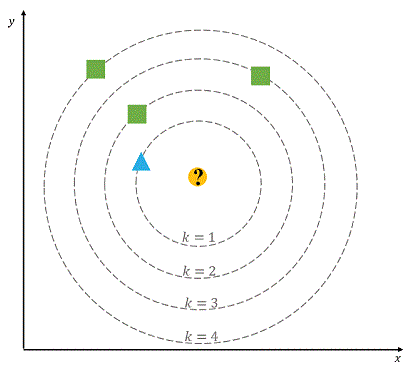

In this tutorial, we will investigate using k-NN classifier on the Iris-datset.

In [1]:
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
iris_data = datasets.load_iris()

In [3]:
# Function to divide the data into training and testing

import random
random.seed(22)
def separate_data():
    train_A = iris_dataset[0:40]
    test_A = iris_dataset[40:50]
    train_B = iris_dataset[50:90]
    test_B = iris_dataset[90:100]
    train_C = iris_dataset[100:140]
    test_C = iris_dataset[140:150]
    train = np.concatenate((train_A,train_B,train_C))
    test =  np.concatenate((test_A,test_B,test_C))
    return train,test

iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

X_train = np.array([i[:4] for i in Filetrain])
y_train = np.array([i[4] for i in Filetrain])
X_test = np.array([i[:4] for i in Filetest])
y_test = np.array([i[4] for i in Filetest])

In [4]:
def distance(p1, p2):
    squared_difference = 0.0
    for i in range(len(p1)):
        squared_difference += (p1[i] - p2[i])**2
    final_distance = squared_difference ** 0.5
    return final_distance

In [6]:
def fit(test_sample, training_set, training_labels, k):
    
    distances = []
    
    # Computing the distances for all data points with respect to test sample     
    
    for i in range(len(training_set)):
        distance_to_point = distance(test_sample, training_set[i])
        distances.append([distance_to_point, training_set[i], training_labels[i]])
    # sort the distances
    distances.sort(key = lambda x : x[0])
    
    # Find the k nearest neighbours according to the distances
    k_nearest_neighbours = distances[0:k]
    
    # Getting class with majority voting     
    label_counts = {}
    for i in range(0, k):
        closest_label = k_nearest_neighbours[i][2]

        if (closest_label in label_counts) == True:
            label_counts[closest_label] += 1
        else:
            label_counts[closest_label] = 1
       
    labelCounts = list(label_counts.values())
    classes = list(label_counts.keys())
    y_pred = classes[labelCounts.index(max(labelCounts))]
    
    return (k_nearest_neighbours, y_pred)

In [7]:
k = 3
print(f'Test sample predictions for k = {k} \t')
print('*********************************')
for i in range(len(X_test)):
    neighbours, pred_label = fit(X_test[i], X_train, y_train, k)
    if (pred_label == y_test[i]):
        print(f'test sample: {X_test[i]} \t', 
          f'predicted label: {pred_label} \t', f'true label: {y_test[i]} \t', "Correctly classified")
    else:
        
        print(f'test sample: {X_test[i]} \t', 
          f'predicted label: {pred_label} \t', f'true label: {y_test[i]} \t', "Misclassified")

Test sample predictions for k = 3 	
*********************************
test sample: [5.1 3.8 1.9 0.4] 	 predicted label: 0.0 	 true label: 0.0 	 Correctly classified
test sample: [6.3 2.3 4.4 1.3] 	 predicted label: 1.0 	 true label: 1.0 	 Correctly classified
test sample: [6.5 3.  5.5 1.8] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [6.7 2.5 5.8 1.8] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [6.2 2.9 4.3 1.3] 	 predicted label: 1.0 	 true label: 1.0 	 Correctly classified
test sample: [7.2 3.2 6.  1.8] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [4.4 2.9 1.4 0.2] 	 predicted label: 0.0 	 true label: 0.0 	 Correctly classified
test sample: [6.1 2.9 4.7 1.4] 	 predicted label: 1.0 	 true label: 1.0 	 Correctly classified
test sample: [7.1 3.  5.9 2.1] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [4.7 3.2 1.3 0.2] 	 predicted label: 0.0 	 true label: 0.0 	 C

In [8]:
def accuracy(pred_label, true_label):
    TP = 0
    for i in range(len(pred_label)):
        if(pred_label[i] == true_label[i]):
            TP += 1
    
    accuracy = (TP / len(pred_label))
    return accuracy

For k = 1, Accuracy 0.9333333333333333 %
For k = 3, Accuracy 0.9666666666666667 %
For k = 5, Accuracy 0.9666666666666667 %
For k = 7, Accuracy 0.9666666666666667 %
For k = 9, Accuracy 0.9666666666666667 %
For k = 11, Accuracy 0.9666666666666667 %
For k = 13, Accuracy 1.0 %
For k = 15, Accuracy 1.0 %
For k = 17, Accuracy 0.9666666666666667 %
For k = 19, Accuracy 0.9666666666666667 %
For k = 21, Accuracy 0.9666666666666667 %
For k = 23, Accuracy 0.9666666666666667 %
For k = 25, Accuracy 0.9666666666666667 %
For k = 27, Accuracy 0.9666666666666667 %
For k = 29, Accuracy 0.9666666666666667 %


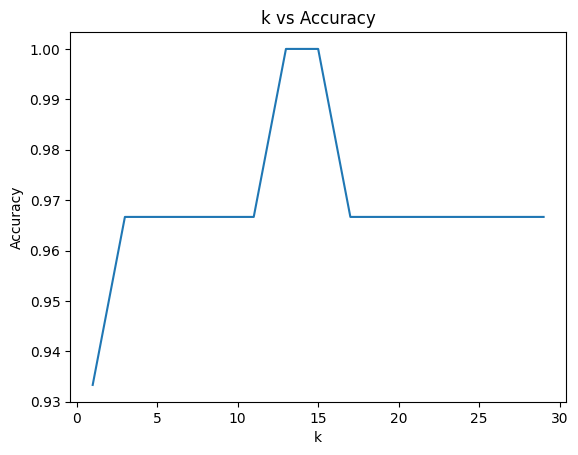

In [9]:
accuracy_list = []
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbours, pred_label = fit(test_instance, X_train, y_train, k)
        y_pred.append(pred_label)
    acc = accuracy(y_pred, y_test)
    print("For k = {}, Accuracy {} %".format(k,acc))
    
    accuracy_list.append(acc)
plt.plot(k_list, accuracy_list)  

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')

plt.show()

In [10]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def decision_boundary(k):
    # For better data visulaisation we considered the first two features (petal length and sepal length) 
    # in the decision boundary plot.
    X = np.concatenate((X_train, X_test))
    X = X[:, :2]
    y = np.concatenate((y_train, y_test))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.c_[xx.ravel(), yy.ravel()]

    y_preds = []

    for item in Z:
        neighbours, pred_label = fit(item, X, y, k)
        y_preds.append(pred_label)
        
     # Put the result into a color plot
    y_preds = np.asarray(y_preds)
    y_preds = y_preds.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, y_preds, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary for k = {0}".format(k))

    plt.show()

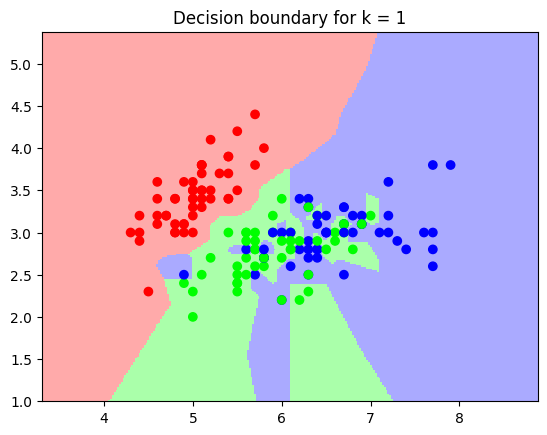

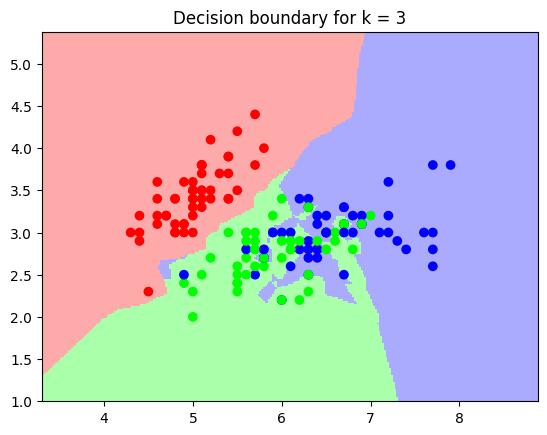

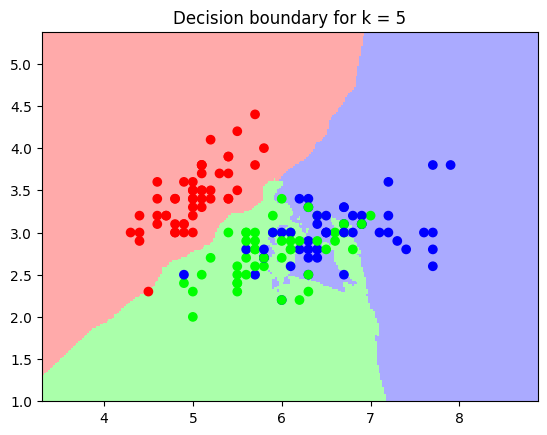

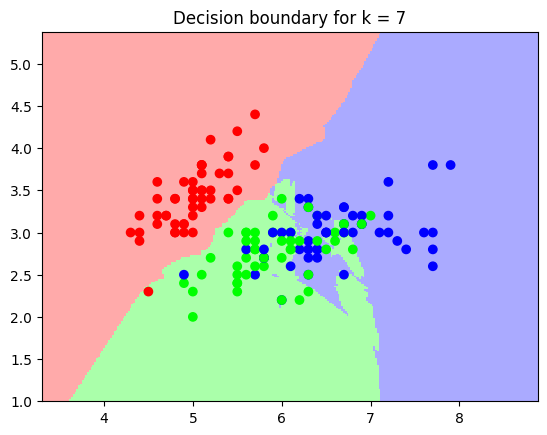

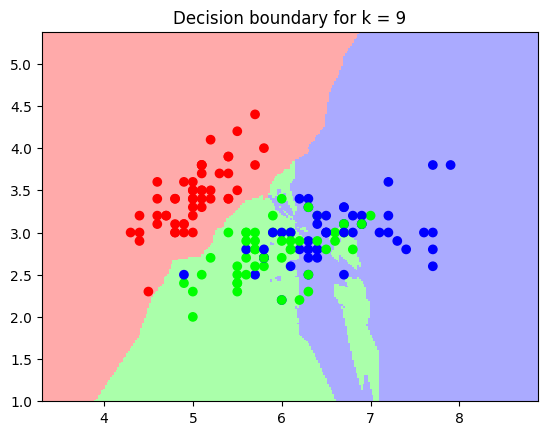

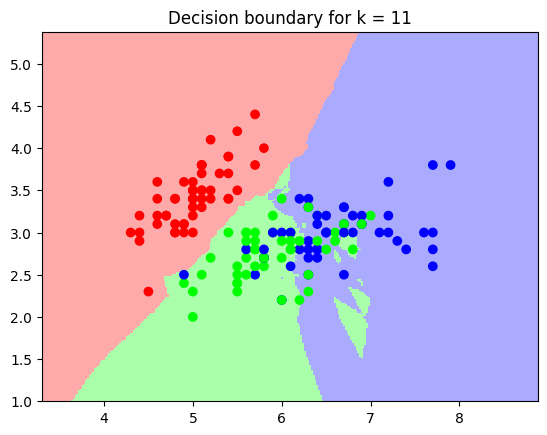

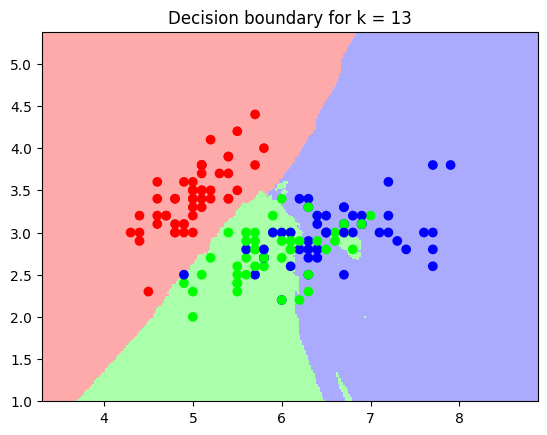

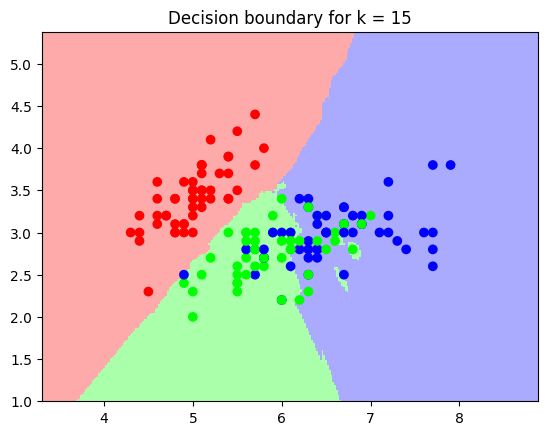

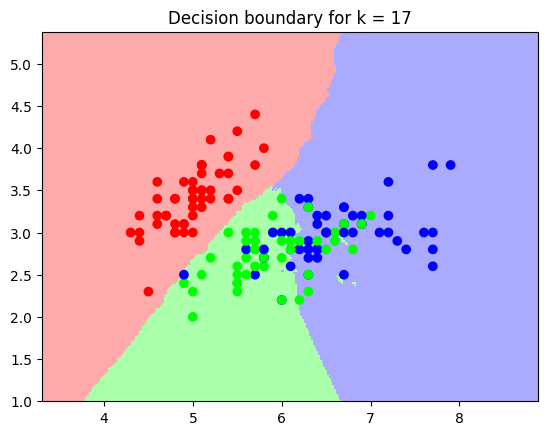

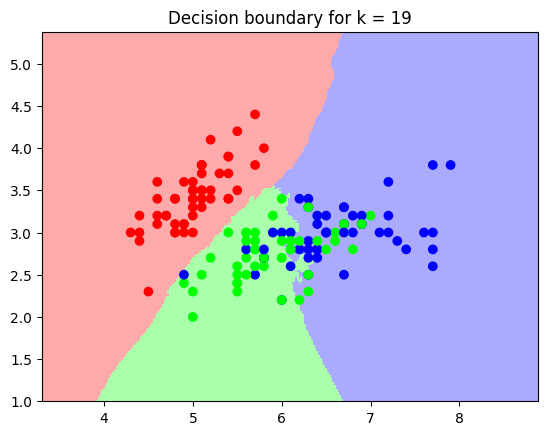

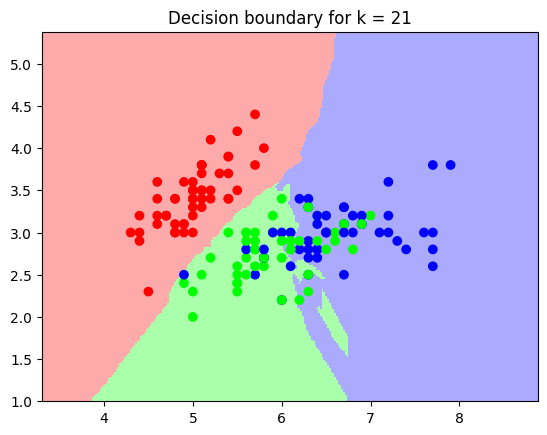

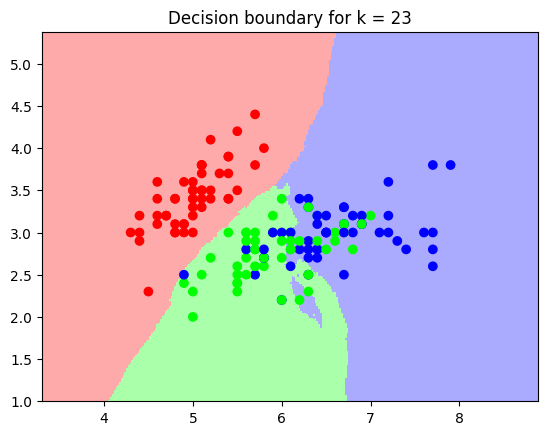

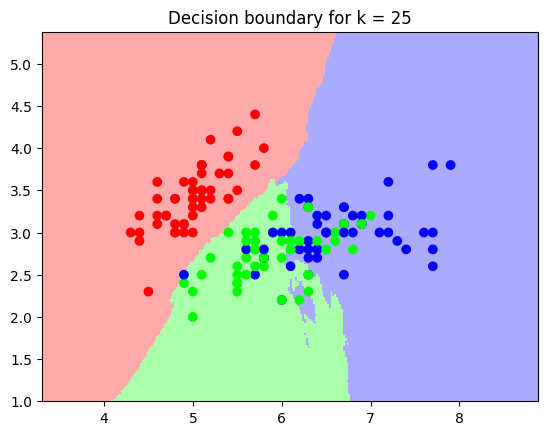

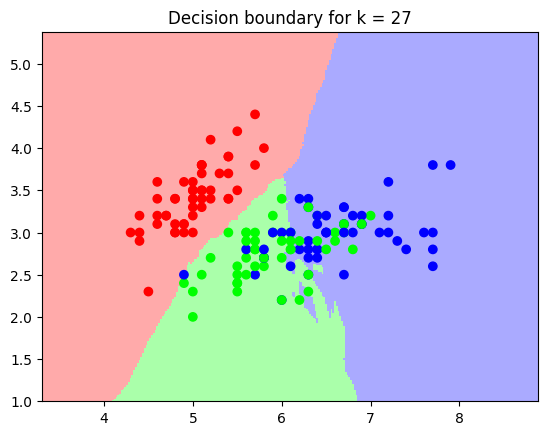

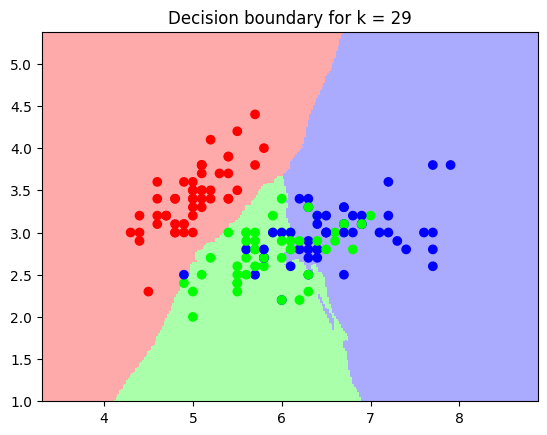

In [11]:
# This code may take several minutes to finish
for k in k_list:
    decision_boundary(k)

# Coursework:

## Task 1:

In the previous exercise, Euclidean distance was used to measure the distance between test sample and its neighbours. Use Minkowski (use p value of 3) and Manhattan distances instead and observe the difference in results. In your report:

- Include the codes you used in estimating Minkowski and Manhattan distances.
- Use the same k values in the previous code for the new distances to get the accuracy.
- Use a table to compare the accuracy for each distance measure and k value and include that in your report.
- Discuss your results.

In [112]:
def minkowski_distance(p1, p2):
    cube_difference = 0.0
    for i in range(len(p1)):
        cube_difference += np.abs((p1[i] - p2[i])**3)
    final_distance = cube_difference ** (1/3)
    return final_distance

In [113]:
def manhattan_distance(p1, p2):
    final_distance = 0.0
    for i in range(len(p1)):
        final_distance += np.abs(p1[i] - p2[i])
    return final_distance

In [114]:
def fit(test_sample, training_set, training_labels, k, dist_metric):
    
    distances = []
    
    # Computing the distances for all data points with respect to test sample     
    for i in range(len(training_set)):
        if dist_metric == "minkowski":
            distance_to_point = minkowski_distance(test_sample, training_set[i])
        elif dist_metric == "manhattan":
            distance_to_point = manhattan_distance(test_sample, training_set[i])
        else:
            distance_to_point = distance(test_sample, training_set[i])
        distances.append([distance_to_point, training_set[i], training_labels[i]])
    # sort the distances
    distances.sort(key = lambda x : x[0])
    
    # Find the k nearest neighbours according to the distances
    k_nearest_neighbours = distances[0:k]
    
    # Getting class with majority voting     
    label_counts = {}
    for i in range(0, k):
        closest_label = k_nearest_neighbours[i][2]

        if (closest_label in label_counts) == True:
            label_counts[closest_label] += 1
        else:
            label_counts[closest_label] = 1
       
    labelCounts = list(label_counts.values())
    classes = list(label_counts.keys())
    y_pred = classes[labelCounts.index(max(labelCounts))]
    
    return (k_nearest_neighbours, y_pred)

In [129]:
def plot_accuracy(k_list, dist_metric="euclidean", print_info=True, plot=True):
    accuracy_list = []

    for k in k_list:
        y_pred = []
        for test_instance in X_test:
            neighbours, pred_label = fit(test_instance, X_train, y_train, k, dist_metric)
            y_pred.append(pred_label)
        acc = accuracy(y_pred, y_test)
        if print_info:
            print("For k = {}, Accuracy {} %".format(k,acc))
        
        accuracy_list.append(acc)
        
    if plot:
        plt.plot(k_list, accuracy_list)  
        plt.xlabel('k')
        plt.ylabel('Accuracy')
        plt.title('k vs Accuracy (%s)' % dist_metric)

        plt.show()
    
    return accuracy_list

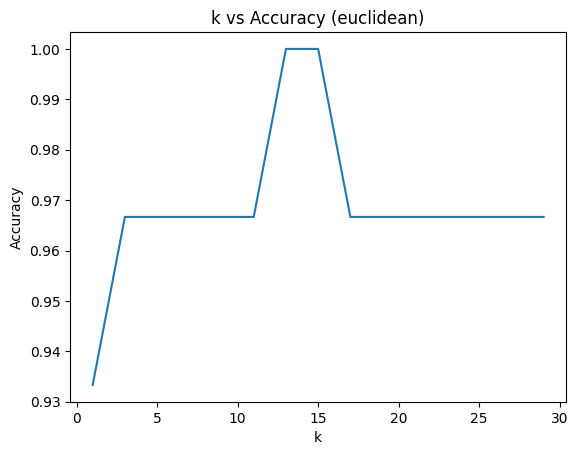

In [130]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
acc_euclidean = plot_accuracy(k_list, dist_metric="euclidean", print_info=False)

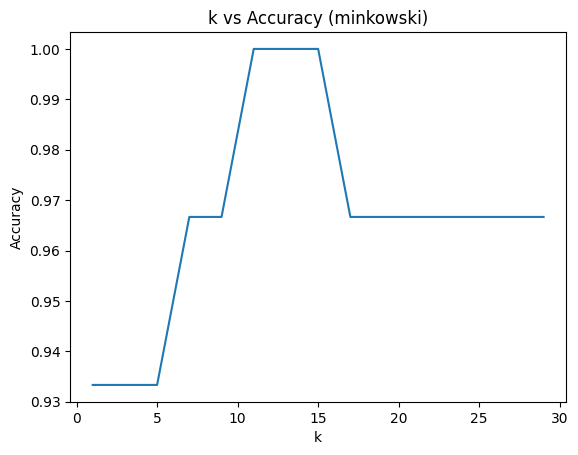

In [131]:
acc_minkowski = plot_accuracy(k_list, dist_metric="minkowski", print_info=False)

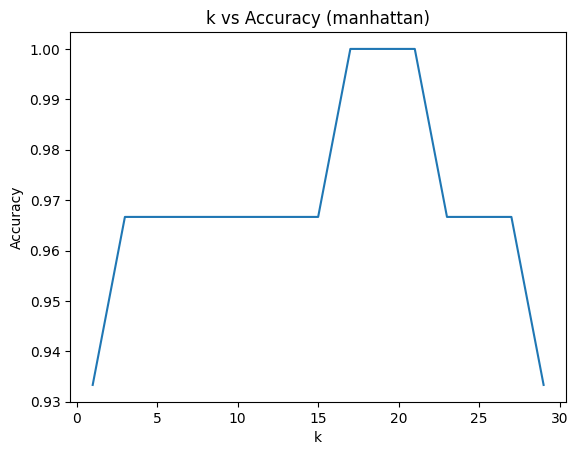

In [132]:
acc_manhattan = plot_accuracy(k_list, dist_metric="manhattan", print_info=False)

In [133]:
acc_dict = {
    "k": k_list,
    "Euclidean": acc_euclidean,
    "Minkowski (p=3)": acc_minkowski,
    "Manhattan": acc_manhattan
}
df_accs = pd.DataFrame(acc_dict)
df_accs.set_index("k", inplace=True)
display(df_accs)

,Euclidean,Minkowski (p=3),Manhattan
k,,,
1,0.933333,0.933333,0.933333
3,0.966667,0.933333,0.966667
5,0.966667,0.933333,0.966667
7,0.966667,0.966667,0.966667
9,0.966667,0.966667,0.966667
11,0.966667,1.000000,0.966667
13,1.000000,1.000000,0.966667
15,1.000000,1.000000,0.966667
17,0.966667,0.966667,1.000000


## Task 2:

Write a code using scikit-learn to do the same procedure in the tutorial and repeat Task 1 with scikitlearn. In your report:

- Include your code.
- Table for comparing the results as in Task 1.

Useful links:

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [147]:
def fit_sklearn(k_list, dist_metric="euclidean", plot=True):
    if dist_metric == "minkowski":
        p = 3
    elif dist_metric == "manhattan":
        p = 1
    else:
        p = 2
    
    accuracy_list = []
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        acc = accuracy(y_test, y_test_pred)
        accuracy_list.append(acc)
        
    if plot:
        plt.plot(k_list, accuracy_list)  
        plt.xlabel('k')
        plt.ylabel('Accuracy')
        plt.title('k vs Accuracy (%s)' % dist_metric)
        plt.show()
        
    return accuracy_list

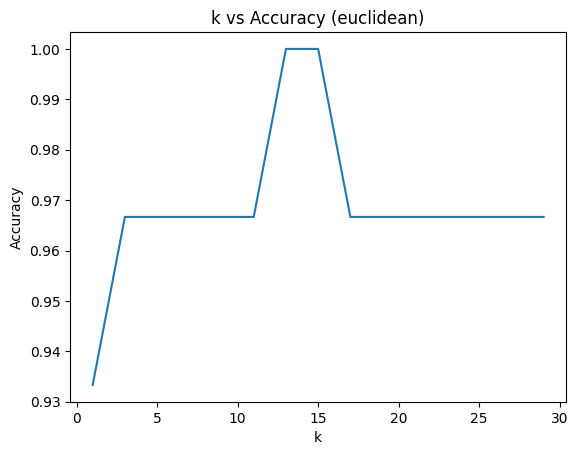

In [148]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
acc_euclidean_sklearn = fit_sklearn(k_list, dist_metric="euclidean")

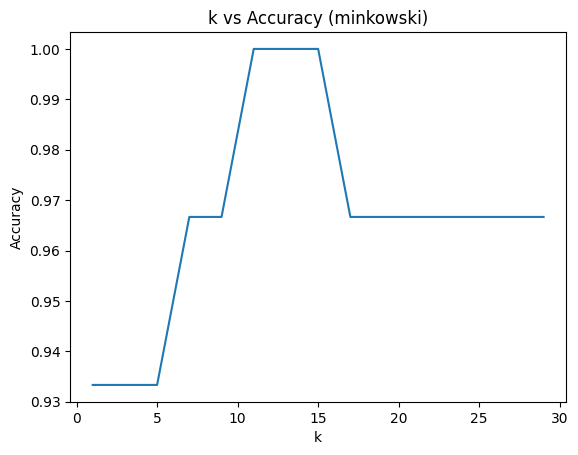

In [150]:
acc_minkowski_sklearn = fit_sklearn(k_list, dist_metric="minkowski")

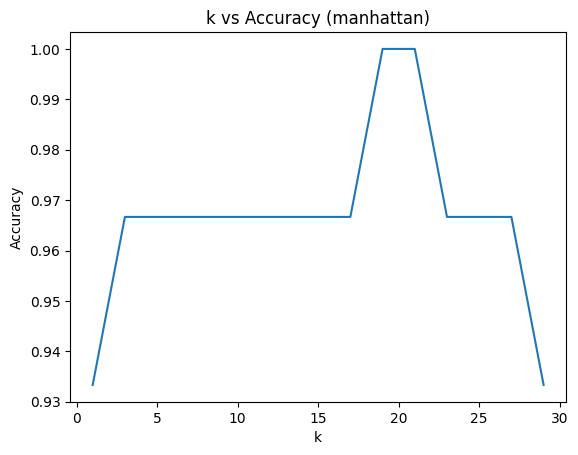

In [152]:
acc_manhattan_sklearn = fit_sklearn(k_list, dist_metric="manhattan")

In [154]:
acc_dict_full = {
    "k": k_list,
    "Euclidean": acc_euclidean,
    "Euclidean (sklearn)": acc_euclidean_sklearn,
    "Minkowski": acc_minkowski,
    "Minkowski (sklearn)": acc_minkowski_sklearn,
    "Manhattan": acc_manhattan,
    "Manhattan (sklearn)": acc_manhattan_sklearn
}
df_accs_full = pd.DataFrame(acc_dict_full)
df_accs_full.set_index("k", inplace=True)
display(df_accs_full)

,Euclidean,Euclidean (sklearn),Minkowski,Minkowski (sklearn),Manhattan,Manhattan (sklearn)
k,,,,,,
1,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
3,0.966667,0.966667,0.933333,0.933333,0.966667,0.966667
5,0.966667,0.966667,0.933333,0.933333,0.966667,0.966667
7,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
9,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
11,0.966667,0.966667,1.000000,1.000000,0.966667,0.966667
13,1.000000,1.000000,1.000000,1.000000,0.966667,0.966667
15,1.000000,1.000000,1.000000,1.000000,0.966667,0.966667
17,0.966667,0.966667,0.966667,0.966667,1.000000,0.966667


## Task 3:

Consider the original code again of this tutorial using Euclidean distance. Seperate your training points into two equal subsets and repeat the steps on the tutorial for each subset. Report your observations in terms of the test accuracy for the two subsets compared with the original data.

In [176]:
# Get random split indices
N = len(X_train)
argset1 = np.random.choice(range(N), N//2, replace=False)
argset2 = [k for k in range(N) if k not in argset1]

# Split datasets
X_train1 = X_train[argset1]
X_train2 = X_train[argset2]
y_train1 = y_train[argset1]
y_train2 = y_train[argset2]

In [218]:
def fit(test_sample, training_set, training_labels, k):
    distances = []   
    for i in range(len(training_set)):
        distance_to_point = distance(test_sample, training_set[i])
        distances.append([distance_to_point, training_set[i], training_labels[i]])
    distances.sort(key = lambda x : x[0])
    k_nearest_neighbours = distances[0:k]  
    label_counts = {}
    for i in range(0, k):
        closest_label = k_nearest_neighbours[i][2]
        if (closest_label in label_counts) == True:
            label_counts[closest_label] += 1
        else:
            label_counts[closest_label] = 1       
    labelCounts = list(label_counts.values())
    classes = list(label_counts.keys())
    y_pred = classes[labelCounts.index(max(labelCounts))]    
    return (k_nearest_neighbours, y_pred)

def compare_accuracy(X_train1, y_train1, X_train2, y_train2):
    accs1, accs2 = [], []
    k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
    for k in k_list:
        y_pred1, y_pred2 = [], []
        for test_instance in X_test:
            _, pred_label1 = fit(test_instance, X_train1, y_train1, k)
            _, pred_label2 = fit(test_instance, X_train2, y_train2, k)
            y_pred1.append(pred_label1)
            y_pred2.append(pred_label2)
        acc1 = accuracy(y_pred1, y_test)
        acc2 = accuracy(y_pred2, y_test)
        print("For k = %d\tAccuracy (S1) = %.3f\tAccuracy (S2) = %.3f" % (k, acc1, acc2))
        accs1.append(acc1)
        accs2.append(acc2)
    plt.plot(k_list, accs1, label="Subset 1")  
    plt.plot(k_list, accs2, label="Subset 2")  
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('k vs Accuracy')
    plt.legend()
    plt.show()    
    return

def compare_decision_boundary(k1, k2, X_train1, y_train1, X_train2, y_train2):
    X = np.r_[X_train1, X_train2, X_test]
    y = np.r_[y_train1, y_train2, y_test]
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    fig.set_size_inches(12,4.5)
    
    X1 = np.concatenate((X_train1, X_test))
    X1 = X1[:, :2]
    y1 = np.concatenate((y_train1, y_test))
    x1_min, x1_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
    y1_min, y1_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
    xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))
    Z1 = np.c_[xx1.ravel(), yy1.ravel()]
    y1_preds = []
    for item in Z1:
        neighbours, pred_label = fit(item, X1, y1, k1)
        y1_preds.append(pred_label)
    y1_preds = np.asarray(y1_preds).reshape(xx1.shape)
    
    ax1.pcolormesh(xx1, yy1, y1_preds, cmap=cmap_light)
    ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)    
    ax1.set_title("Subset 1: Decision boundary for k = {0}".format(k1))
    
    X2 = np.concatenate((X_train2, X_test))
    X2 = X2[:, :2]
    y2 = np.concatenate((y_train2, y_test))
    x2_min, x2_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y2_min, y2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, h), np.arange(y2_min, y2_max, h))
    Z2 = np.c_[xx2.ravel(), yy2.ravel()]
    y2_preds = []
    for item in Z2:
        neighbours, pred_label = fit(item, X2, y2, k2)
        y2_preds.append(pred_label)
    y2_preds = np.asarray(y2_preds).reshape(xx2.shape)
    
    ax2.pcolormesh(xx2, yy2, y2_preds, cmap=cmap_light)
    ax2.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)    
    ax2.set_title("Subset 2: Decision boundary for k = {0}".format(k2))
    
    axmin, aymin = max(xx1.min(), xx2.min()), max(yy1.min(), yy2.min())
    axmax, aymax = min(xx1.max(), xx2.max()), min(yy1.max(), yy2.max())
    ax1.set_xlim(axmin, axmax)
    ax1.set_ylim(aymin, aymax)
    ax2.set_xlim(axmin, axmax)
    ax2.set_ylim(aymin, aymax)    

    plt.show()

For k = 1	Accuracy (S1) = 0.933	Accuracy (S2) = 0.967
For k = 3	Accuracy (S1) = 0.933	Accuracy (S2) = 1.000
For k = 5	Accuracy (S1) = 0.933	Accuracy (S2) = 1.000
For k = 7	Accuracy (S1) = 0.967	Accuracy (S2) = 0.933
For k = 9	Accuracy (S1) = 1.000	Accuracy (S2) = 0.933
For k = 11	Accuracy (S1) = 1.000	Accuracy (S2) = 0.933
For k = 13	Accuracy (S1) = 0.967	Accuracy (S2) = 0.933
For k = 15	Accuracy (S1) = 0.967	Accuracy (S2) = 0.933
For k = 17	Accuracy (S1) = 0.967	Accuracy (S2) = 0.933
For k = 19	Accuracy (S1) = 0.967	Accuracy (S2) = 0.900
For k = 21	Accuracy (S1) = 0.967	Accuracy (S2) = 0.900
For k = 23	Accuracy (S1) = 0.933	Accuracy (S2) = 0.900
For k = 25	Accuracy (S1) = 0.933	Accuracy (S2) = 0.900
For k = 27	Accuracy (S1) = 0.933	Accuracy (S2) = 0.867
For k = 29	Accuracy (S1) = 0.933	Accuracy (S2) = 0.633


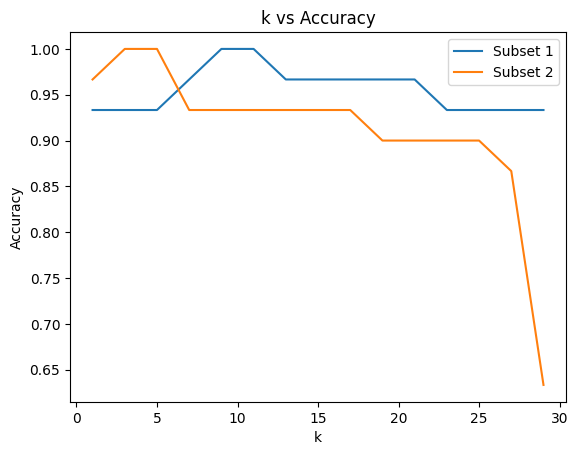

In [219]:
compare_accuracy(X_train1, y_train1, X_train2, y_train2)

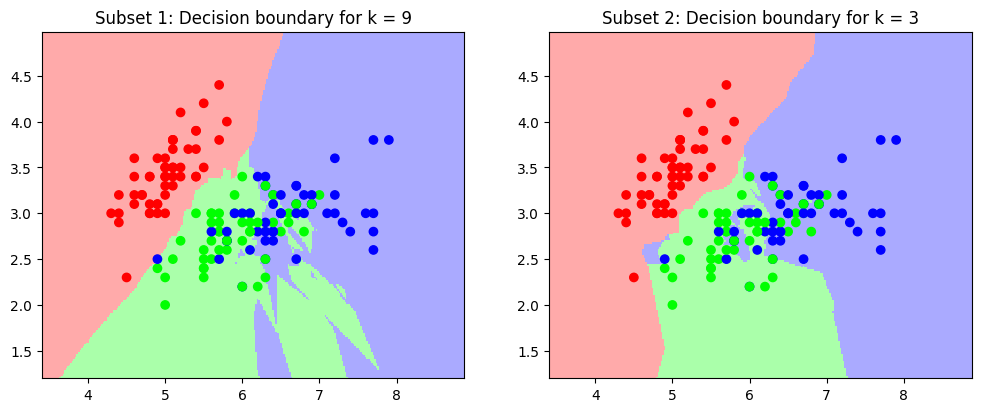

In [217]:
compare_decision_boundary(9, 3, X_train1, y_train1, X_train2, y_train2)